In [32]:
import pandas as pd
import yfinance as yf 
import matplotlib.pyplot as plt
from datetime import datetime

yfinance is the yahoo finance api and is used to get stock prices for selected companies over a date range.

datetime is used to specify dates so that I can filter data for around specific economic events

In [33]:
high_reserve = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']
avg_reserve = ['INTC', 'CSCO', 'ORCL', 'IBM', 'HPQ']     
tickers = high_reserve + avg_reserve

companies with high reserves are AAPL (Apple), MSFT (Microsoft), GOOGL (Google), AMZN (Amazon), and Meta (Facebook)

companies with average reserves are INTC (Intel), CSCO (Cisco), ORCL (Oracle), IBM (IBM), and HPQ(Hewlett-Packard)

I then combined these lists so I can retreive and analyze their stock performance in the same dataset.

In [34]:
data = yf.download(tickers, start="2020-01-01", end="2023-12-31")
stock_data = data['Close'] 

[*********************100%***********************]  10 of 10 completed


yf.download is used to get historical data from the selected comapnies in the stock market along with a start and end date.

using the close principle represents the final trading price of the stock for that day, this is a common metric used for analysis

In [35]:
event_date = datetime(2022, 3, 16)

on this date, the Federal Reserve announced a significant interest rate hike, marking it as a key moment of economic uncertainty.

this date will be used as a reference point to analyze how the selected companies' stock prices performed before, during, and after this economic event.

In [36]:
print(stock_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1006 non-null   float64
 1   AMZN    1006 non-null   float64
 2   CSCO    1006 non-null   float64
 3   GOOGL   1006 non-null   float64
 4   HPQ     1006 non-null   float64
 5   IBM     1006 non-null   float64
 6   INTC    1006 non-null   float64
 7   META    1006 non-null   float64
 8   MSFT    1006 non-null   float64
 9   ORCL    1006 non-null   float64
dtypes: float64(10)
memory usage: 86.5 KB
None


This is just used so I can make sure the data was loaded correctly

In [37]:
event_window = stock_data.loc[event_date - pd.Timedelta(days=30):event_date + pd.Timedelta(days=30)]
event_window.head()

Ticker,AAPL,AMZN,CSCO,GOOGL,HPQ,IBM,INTC,META,MSFT,ORCL
Date,,,,,,,,,,
2022-02-14,168.880005,155.167007,53.180000,135.526001,36.509998,130.149994,47.580002,217.699997,295.000000,78.949997
2022-02-15,172.789993,156.510498,54.270000,136.608505,37.369999,129.940002,48.439999,221.000000,300.470001,79.769997
2022-02-16,172.550003,158.100494,54.250000,137.738007,37.889999,129.179993,48.230000,216.539993,299.500000,79.190002
2022-02-17,168.880005,154.652496,55.770000,132.539001,36.419998,124.970001,47.570000,207.710007,290.730011,75.529999
2022-02-18,167.300003,152.601501,57.209999,130.403000,36.200001,124.349998,45.040001,206.160004,287.929993,74.570000


event window is a subset of the stock data centered around a specific economic event. timedelta  uses data from 30 days before and after march 16 2022.

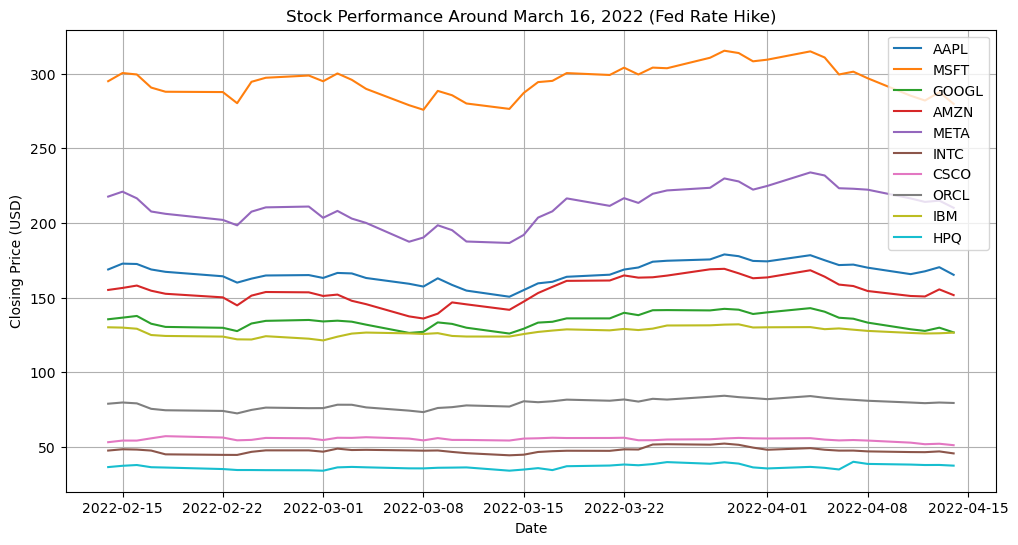

In [38]:
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(event_window.index, event_window[ticker], label=ticker)
plt.title("Stock Performance Around March 16, 2022 (Fed Rate Hike)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid()

plt.show()

this plot shows how each company's stock price moved around the event, allowing for a clear visual comparison of performance during the economic uncertainty